In [1]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np

w[0]: 0.393906  b: -0.031804


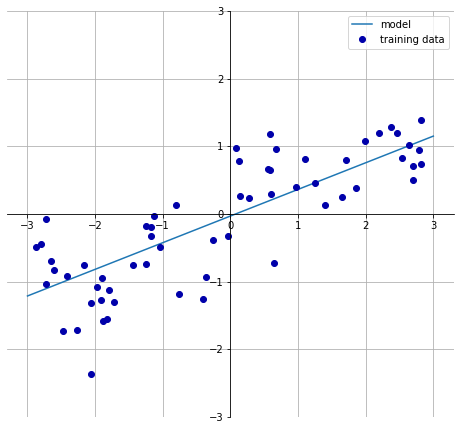

In [2]:
mglearn.plots.plot_linear_regression_wave()
#특성이 하나일 땐 직선, 두개일 땐 평면, 더 높은 차원에서는 hyperplane

In [5]:
#Linear regression, ordinary least squares
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
#weight, coefficient(w) / offset, intercept(b) 각각, 특성이 1개임
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[0.39390555]
-0.031804343026759746
0.6700890315075756
0.65933685968637


In [7]:
#특성이 104개인것 -> 최소제곱법은 overfitting이 심해진다.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr= LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.952051960903273
0.6074721959666125


In [9]:
#Ridge regression, Regularization을 통해 기울기를 작게 만들어 모든 특성이 출력에 주는 영향을 최소화한다.
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744747
0.9282273685001996
0.772206793647981


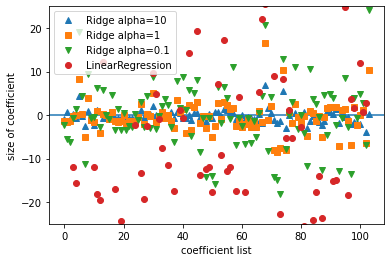

In [13]:
#alpha 값에 따라서 learning_curve 확인
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("coefficient list")
plt.ylabel("size of coefficient")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

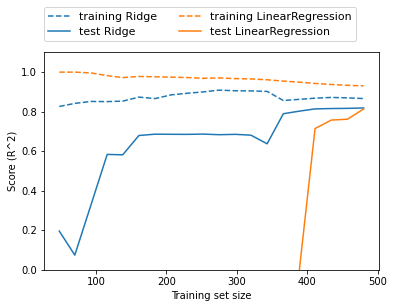

In [14]:
mglearn.plots.plot_ridge_n_samples()
#data의 수가 많다면 regularization 효과가 작아지게 된다.

In [17]:
#Lasso regression -> L1 regularization (몇몇 계수가 0이되면서 feautre selection이 자동으로 이뤄진다.)
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_!=0)) # 사용한 특성의 개수
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_!=0)) # 사용한 특성의 개수
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print(np.sum(lasso00001.coef_!=0)) # 사용한 특성의 개수

0.29323768991114607
0.20937503255272294
4
0.8962226511086497
0.7656571174549982
33
0.9507158754515463
0.6437467421272821
96


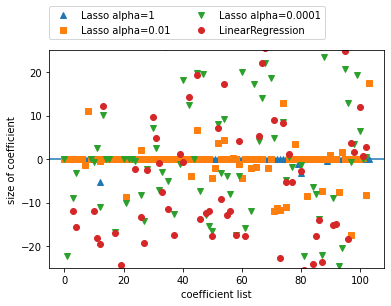

In [20]:
#alpha 값에 따라서 learning_curve 확인
plt.plot(lasso.coef_,'^', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'s', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.0001")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("coefficient list")
plt.ylabel("size of coefficient")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


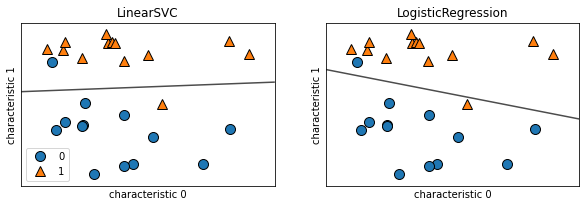

In [21]:
#binary classification problem
#logistic regression , support vector machine
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("characteristic 0")
    ax.set_ylabel("characteristic 1")
axes[0].legend()

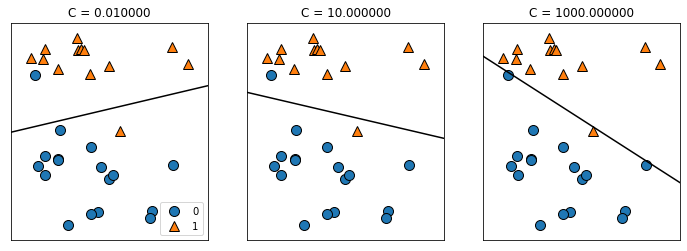

In [22]:
#C의 값이 regularization 강도를 조절한다. C의 값이 클수록 규제가 감소하여 training set에 맞추려고 한다.
mglearn.plots.plot_linear_svc_regularization()

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))


0.9460093896713615
0.958041958041958
0.9460093896713615
0.958041958041958
0.9342723004694836
0.9300699300699301


/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

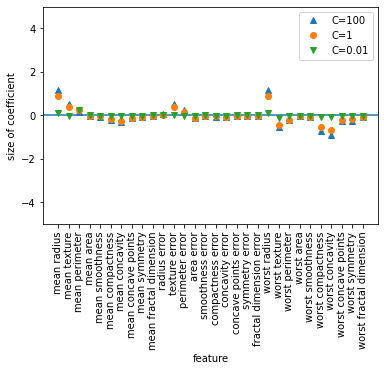

In [26]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("size of coefficient")
plt.legend()
#L2 regularization을 적용하기 때문에 Ridge로 만든것과 기본적으로 LogisticRegression과 서로 비슷하다.

0.001, 0.95
0.001, 0.96
1.000, 0.95
1.000, 0.96
100.000, 0.95
100.000, 0.96


/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

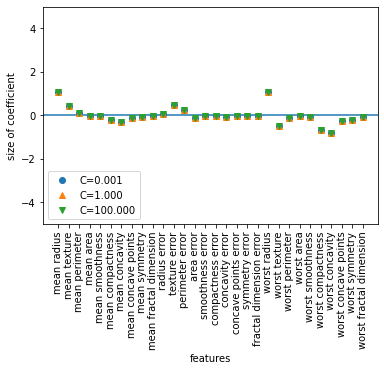

In [28]:
#L1 regression으로도 실행해본다.
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="none").fit(X_train, y_train) #기존엔 L1을 패널티로 입력하면 되는데 현재 라이브러리에선 지원하지 않는 듯
    print("{:.3f}, {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("{:.3f}, {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("features")
plt.ylabel("size of coefficient")
plt.ylim(-5, 5)
plt.legend(loc = 3)

(3, 2)
(3,)


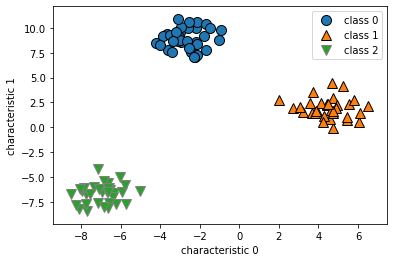

In [30]:
#softmax를 이용한 다중 클래스 분류
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.legend(["class 0","class 1","class 2"])

(3, 2)
(3,)


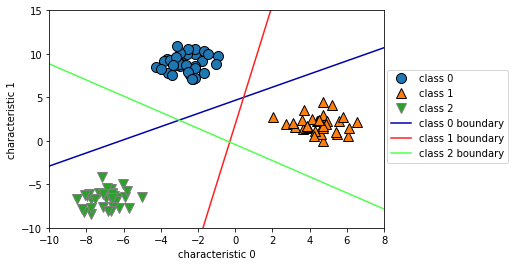

In [31]:
#3개의 linear svm이 만드는 경계 시각화
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))

Text(0, 0.5, 'characteristic 1')

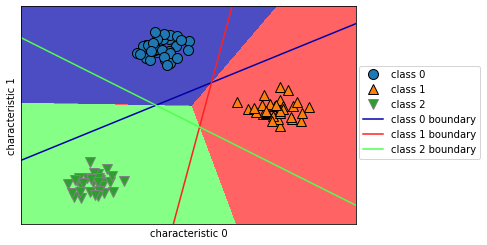

In [32]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")

In [40]:
#naive bayes 분류기 -> 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합한다.
#GaussianNB, BernoulliNB, MultinomialNB
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(counts)
#위는 BernoulliNB 방법이고, multinomialNB는 특성의 평균 계산, 가우시안은 특성의 평균, 표준편차를 저장한다.

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
